# Описание проекта
Сеть фитнес-центров «***Культурист-датасаентист***» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — *отток клиентов*. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
      1) выделить целевые группы клиентов;
      2) предложить меры по снижению оттока;
      3) определить другие особенности взаимодействия с клиентами.
      

***Текущие поля в датасете:***
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце;

## Шаг 1. Загрузка данных

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
gym_churn = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
gym_churn.duplicated().sum()

0

* Пропусков нет.
* Все форматы данных соответсвуют.
* Дубликатов нет.
* Нужно привести все названия сталбцов к нижнему регистру.

In [6]:
gym_churn.columns = gym_churn.columns.str.lower()

In [7]:
gym_churn['month_to_end_contract'] = pd.to_numeric(gym_churn['month_to_end_contract'], errors='coerce').astype('int')

In [8]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null int64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 437.6 KB


## Шаг 2. Проведём исследовательский анализ данных (EDA)
* **Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения.**

In [9]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


* Распределение по генденому прихзнаку примерно одинаковое
* Большинство клиентов (85%) живет или работает районе, где находится фитнес-центр
* Чуть меньше половины клиентов являются сотрудниками партнерских организаций
* 30% клиентов пришли по программе "Приведи друга"
* Известны мобильные номера 90% клиентов
* Средняя длительность абонемента - 4.7 месяца
* 41% клиентов посещают групповые занятия
* Средний возраст клиентов 29 лет
* Суммарная выручка от сопутсвующих услуг фитнес-центра на клиента - 147
* Средний срок до окончания действующего абонемента - 4.3 месяцев
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
* средняя частота посещений за все время с начала действия абонемента - 1.88 раз в неделю
* Средняя частота посещений за последний месяц - 1.77 раз в неделю

**Доля оттока - 27%**

* **Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.**

In [10]:
gym_churn.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


* Распределение по генденому прихзнаку примерно одинаковое
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга", реже уходят в отток
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность абонемента больше у оставшихся пользователей, у большей части клиентов в оттоке срок абонемента составляет 1 месяц
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
* У групп есть разница в среднем возрасте клиентов(Оставшиеся - 30 лет, в оттоке - 27 лет)
* Есть небольшое различие в выручке от сопутсвующих услуг фитнес-центра (в пользу оставшихся клиентов)
* Оставшееся время до окончания действующего абонемента, логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

* **Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

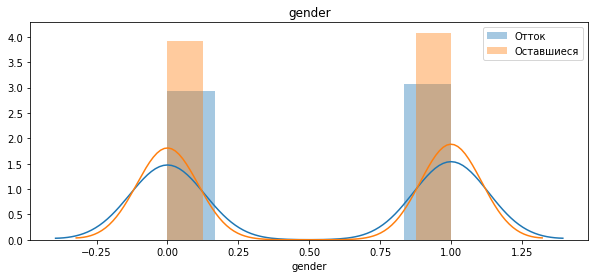

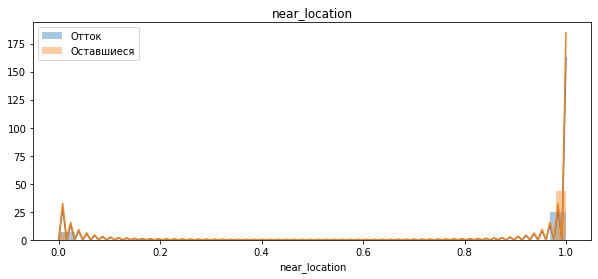

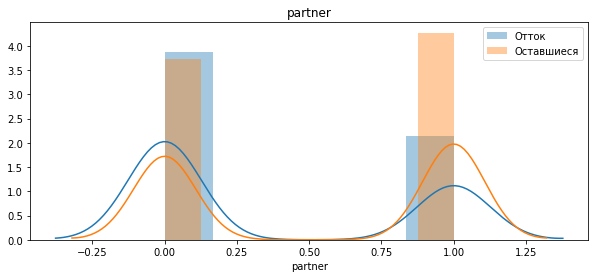

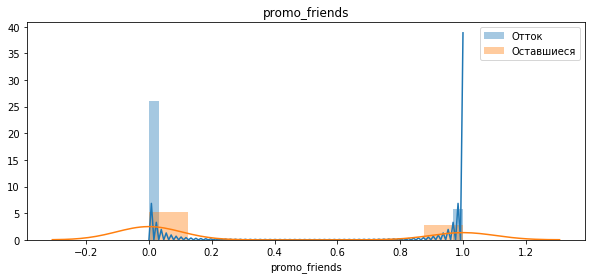

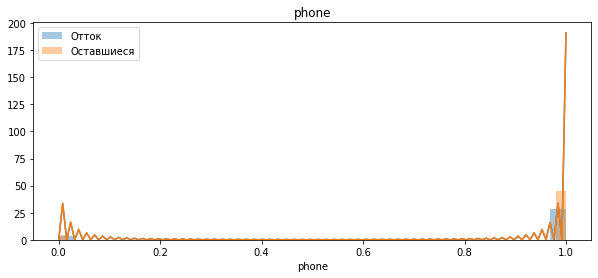

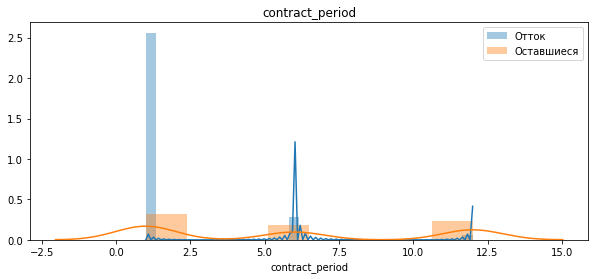

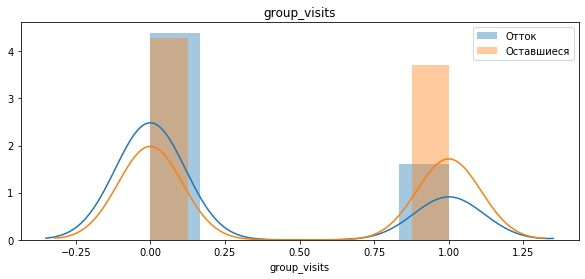

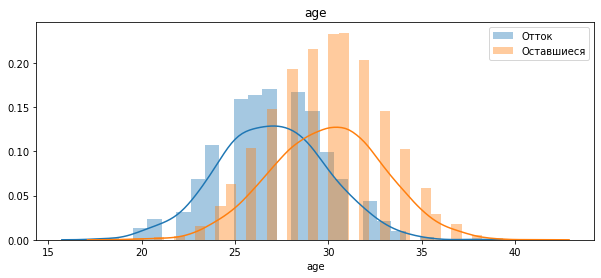

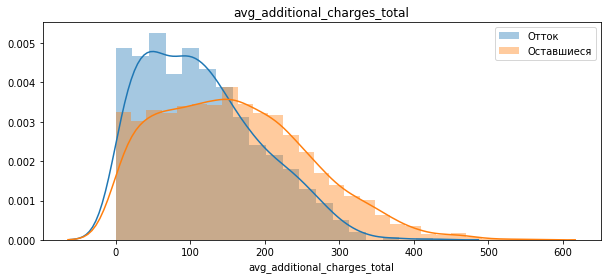

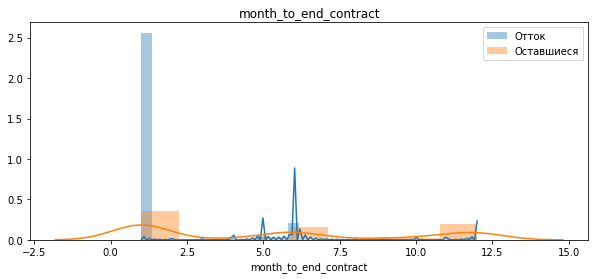

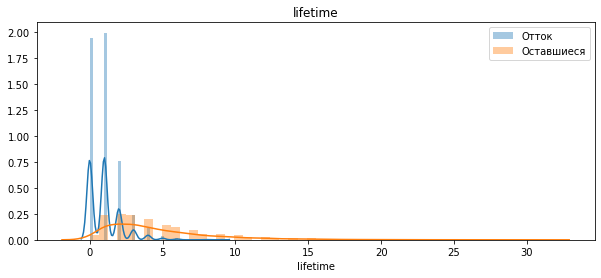

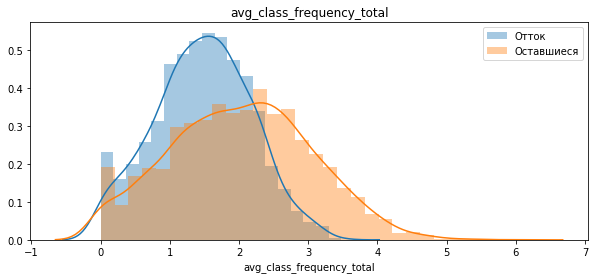

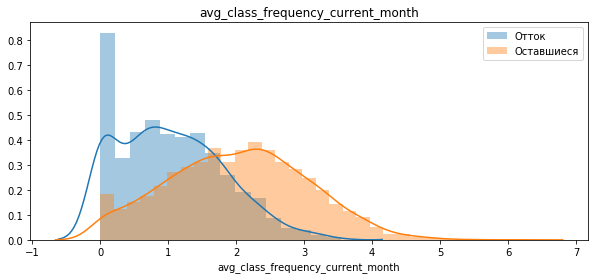

In [11]:
wane = gym_churn.query('churn == "1"')
stayed = gym_churn.query('churn == "0"')
gym_col = gym_churn.drop('churn', axis = 1).columns

for column in gym_col:
    plt.figure(figsize=(10,4))
    sns.distplot(wane[column])
    sns.distplot(stayed[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.title(column)
    plt.show()

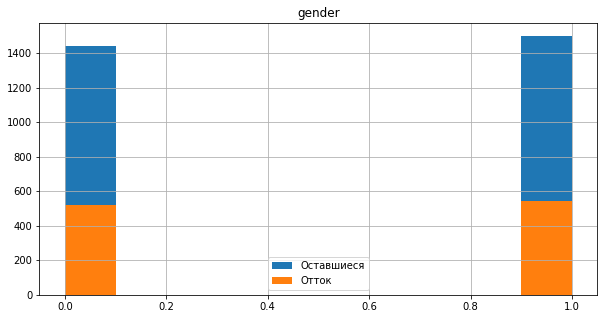

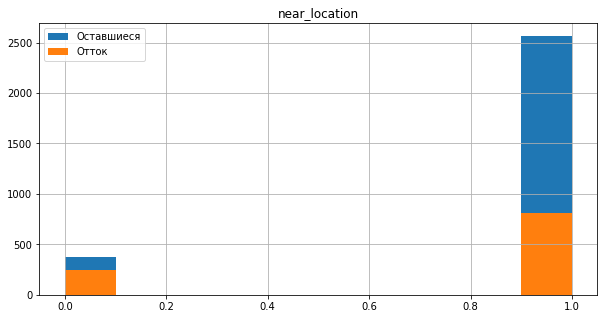

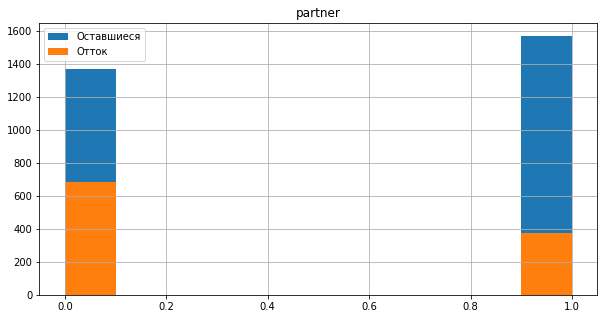

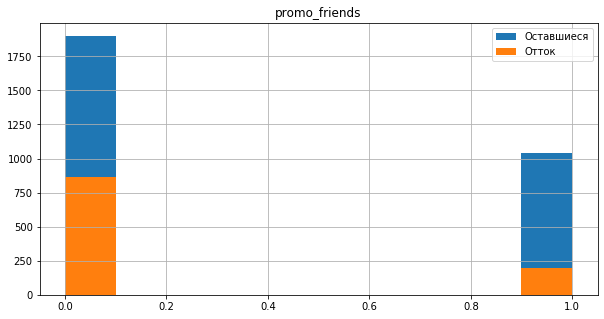

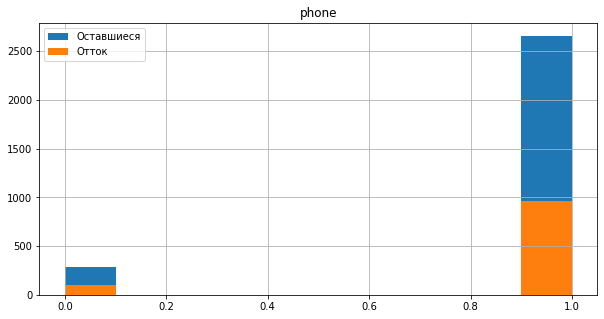

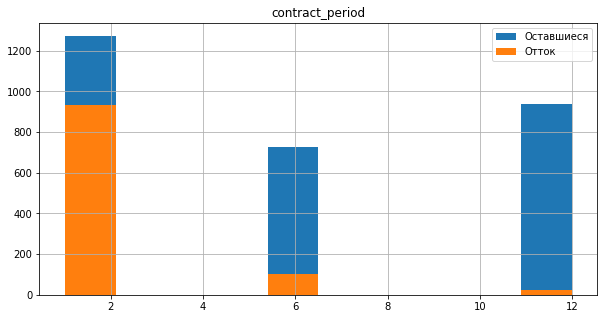

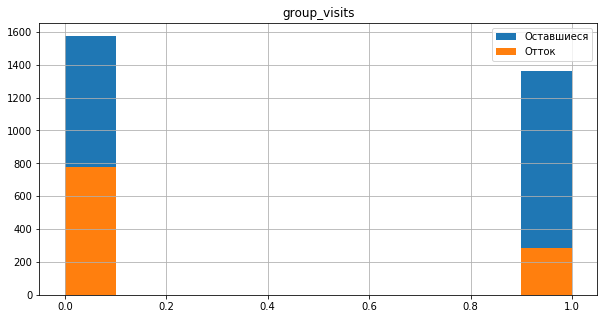

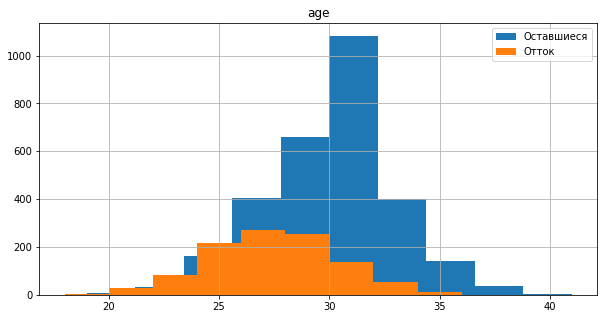

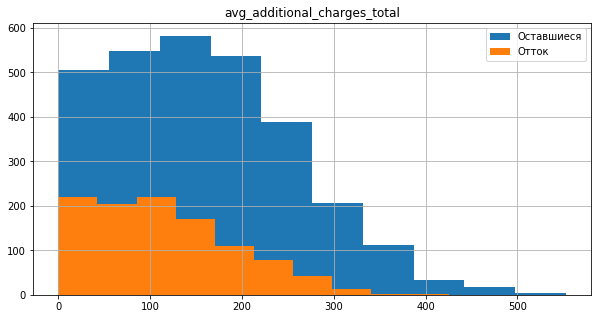

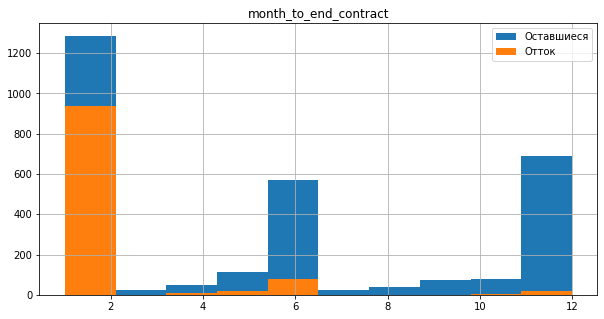

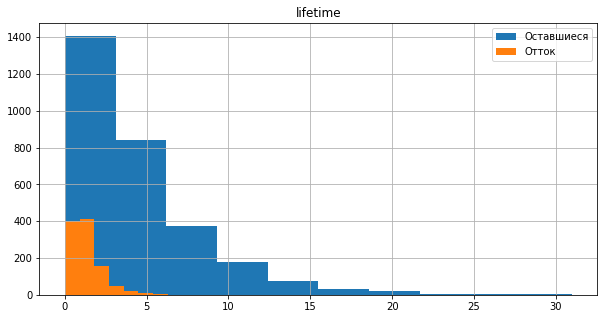

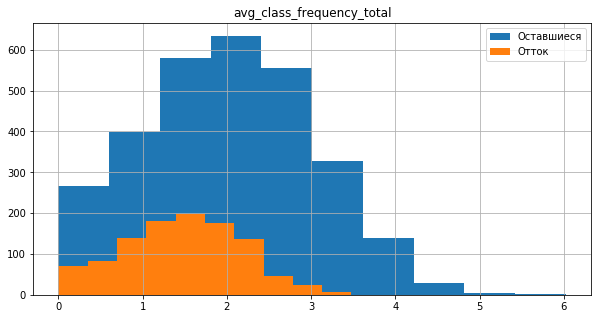

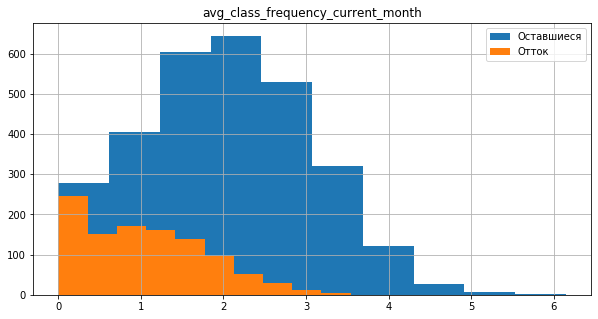

In [12]:
for column in gym_col:
    plt.figure(figsize=(10,5))
    gym_churn.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

* **Построим матрицу корреляций и отобразим её**

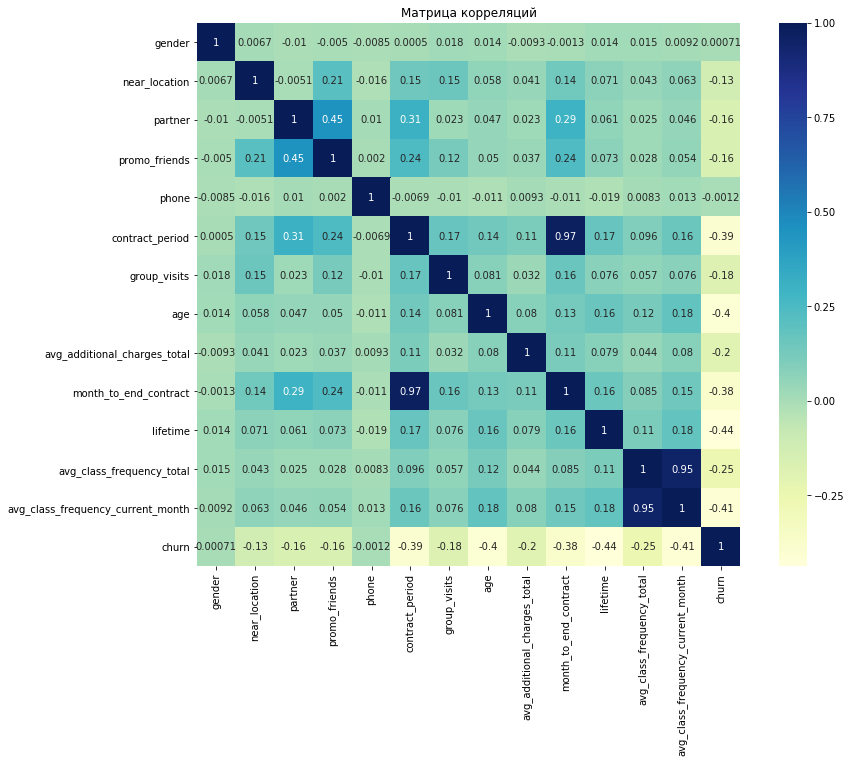

In [13]:
cm = gym_churn.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, square = True, cmap='YlGnBu')# fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.title('Матрица корреляций')
plt.show()

* Явной зависимости факта оттока от признаков не обнаружено
* Имеются два мультиколлинеарных признака - contract_period и month_to_end_contact

## Шаг 3. Построим модель прогнозирования оттока клиентов
* **Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:**
  * Разобьем данные на обучающую и валидационную выборку функцией train_test_split().
  * Обучим модель на train-выборке двумя способами:
    * логистической регрессией,
    * случайным лесом.
  * Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Какая модель показала себя лучше на основании метрик?

In [14]:
#Разбейте данные на обучающую и валидационную выборку
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train)
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [15]:
# задайте список моделей
models = [LogisticRegression(random_state=0), RandomForestClassifier(n_estimators = 100, random_state = 0)]

def make_prediction(m, X_train, y_train, X_test):
    model = m
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:,1]
    print('accuracy_score: {}\nprecision_score: {}\nrecall_score: {}\nf1_score: {}'.format(
        accuracy_score(y_test, predictions),
        precision_score(y_test, predictions),
        recall_score(y_test, predictions),
        f1_score(y_test, predictions)
    ))
    
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score: 0.93
precision_score: 0.8939393939393939
recall_score: 0.8349056603773585
f1_score: 0.8634146341463415
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy_score: 0.915
precision_score: 0.875
recall_score: 0.7924528301886793
f1_score: 0.8316831683168316


* Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии
* Таким образом, модель логистической регрессии показала себя лучше.

## Шаг 4. Сделаем кластеризацию клиентов
**Отложим в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):**
* Стандартизируем данные.
* Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.
* Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5.

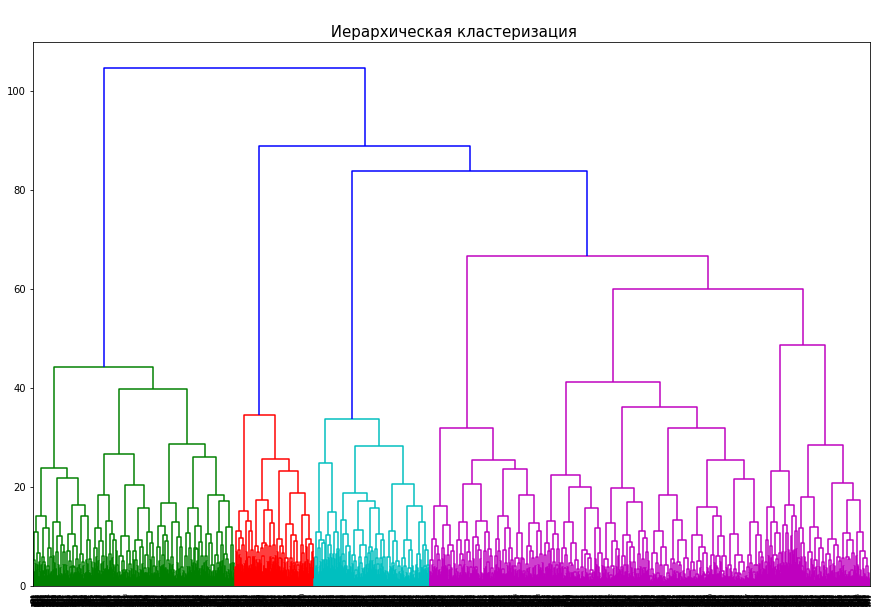

In [16]:
#Стандартизация
X_st = scaler.fit_transform(X)

linked = linkage(X_st, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()

* Явно выделены 4 кластера
* Мы использует 5 по ТЗ

In [17]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state = 0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_st)
# сохраняем метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels

* Посмотрим на средние значения признаков для кластеров.
* Для каждого полученного кластера посчитатем долю оттока. Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [18]:
gym_churn.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


***Описание кластеров:***

* Кластер 0
  * Отток - 2,8% - самый низкий
  * "Высокое" время с момента первого обращения в фитнес-центр - 5 мес.
  * 2ое место по кол-ву посещений за всё время и в последний месяц - 2 раза в неделю
  * 2ое место по суммарной выручка от сопудствующих услуг фитнес-центра - 161
  * Средний возраст 30 лет
  * В основном обладатели долгосрочных абонементов на 1 год
  * 96% клиентов живут или работают недалеко от фитнес-центра
  
* Кластер 1
  * Отток - 27%
  * "Высокое" время с момента первого обращения в фитнес-центр - 4 мес.
  * 3е место по кол-ву посещений за всё время и в последний месяц - 1,8 и 1,7 раза в неделю, соответсвенно
  * 3е место по суммарной выручка от сопудствующих услуг фитнес-центра - 144
  * Средний возраст 29 лет
  * В основном обладатели долгосрочных абонементов на 6 мес
  * 86% клиентов живут или работают недалеко от фитнес-центр
  * Не указывали свой номер телефона

* Кластер 2
  * Отток - 44,4%
  * "Низкое" время с момента первого обращения в фитнес-центр - 2,8 мес.
  * 4ое место по кол-ву посещений за всё время и в последний месяц - 1,66 и 1,48 раза в неделю, соответсвенно
  * 4ое место по суммарной выручка от сопудствующих услуг фитнес-центра - 135,5
  * Средний возраст 28,5 лет
  * Реже всех посещали групповые занятия
  * В основном обладатели не долгосрочных абонементов на 3 мес
  * Клиентов живут или работают не в районе фитнес-центра
  
* Кластер 3
  * Отток - 51,4% - самый высокий
  * "Низкое" время с момента первого обращения в фитнес-центр - 2,4 мес.
  * 5ое место по кол-ву посещений за всё время и в последний месяц - 1,2 и 1 раза в неделю, соответсвенно
  * 5ое место по суммарной выручка от сопудствующих услуг фитнес-центра - 131,6
  * Средний возраст 28 лет
  * В основном обладатели не долгосрочных абонементов на 1-3 мес
  * Клиенты живут или работают в районе фитнес-центра

* Кластер 4
  * Отток - 6,8%
  * "Высокое" время с момента первого обращения в фитнес-центр - 5 мес.
  * 1ое место по кол-ву посещений за всё время и в последний месяц - почти 3 раза в неделю
  * 1ое место по суммарной выручка от сопудствующих услуг фитнес-центра - 161,7
  * Средний возраст 30 лет
  * В основном обладатели не долгосрочных абонементов на 3 мес
  * 98% клиентов живут или работают недалеко от фитнес-центра

* Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?

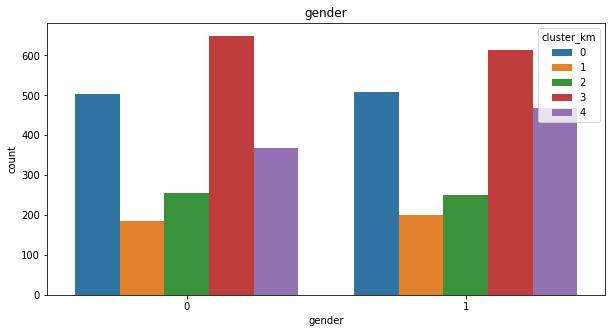

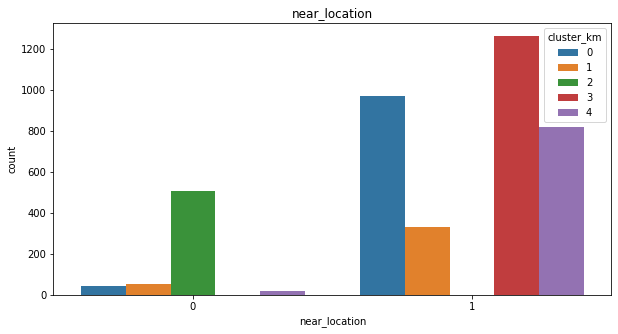

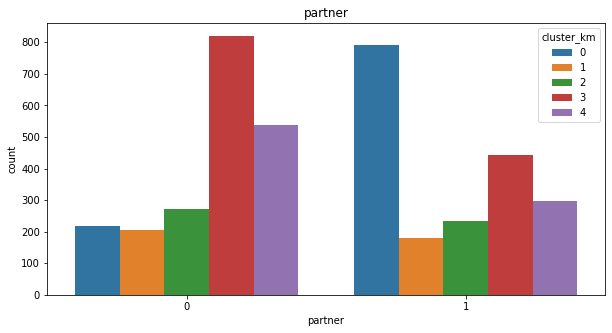

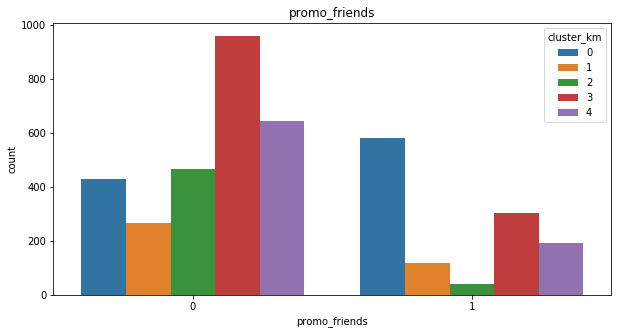

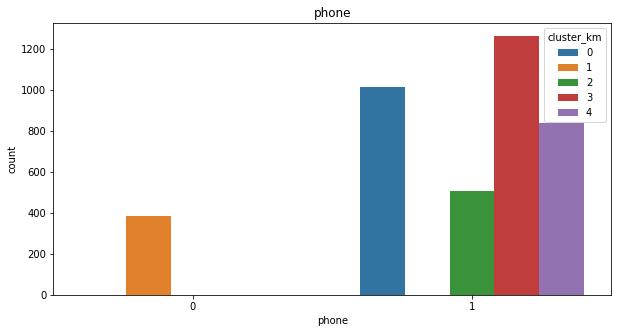

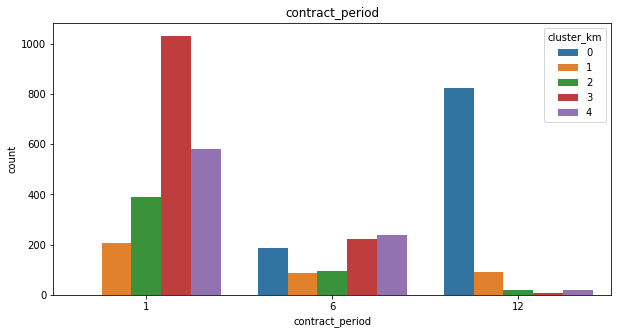

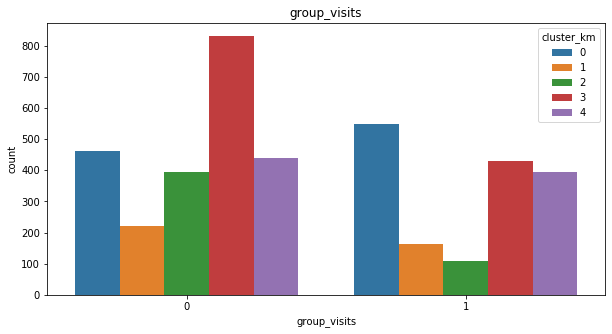

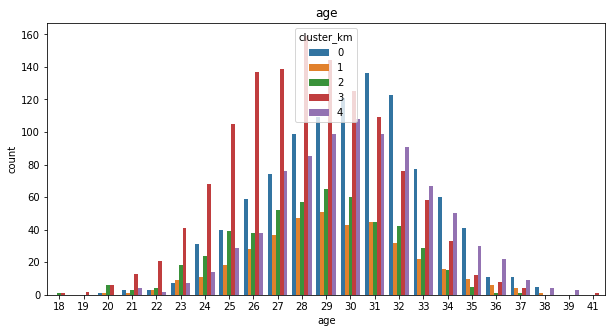

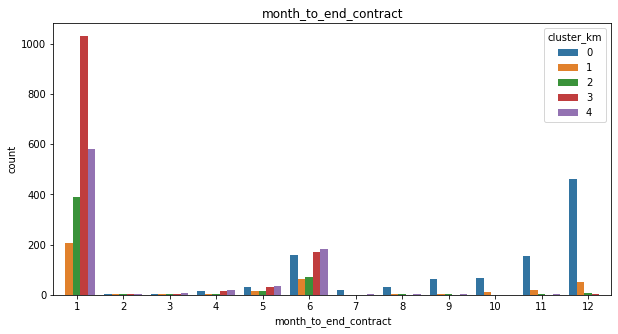

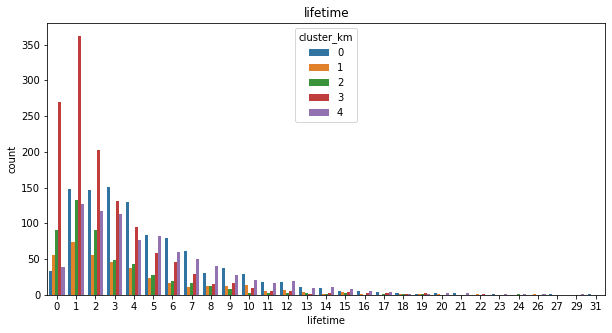

In [19]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone','contract_period', 'group_visits'
               , 'age', 'month_to_end_contract', 'lifetime']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x = gym_churn[column], hue='cluster_km', data=gym_churn)
    plt.title(column)
    plt.show()

3 графика ('avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month'), крайне не информативны, я их убрал.

Но остальные подтверждают выводы, сделанные перед ними.

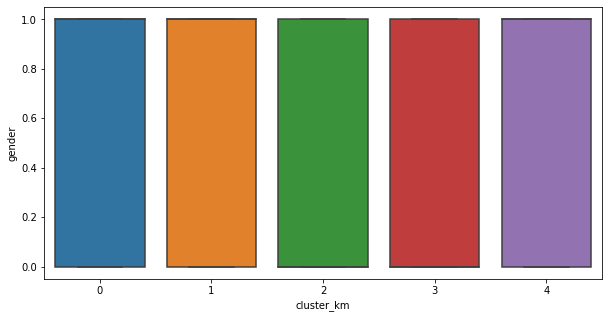

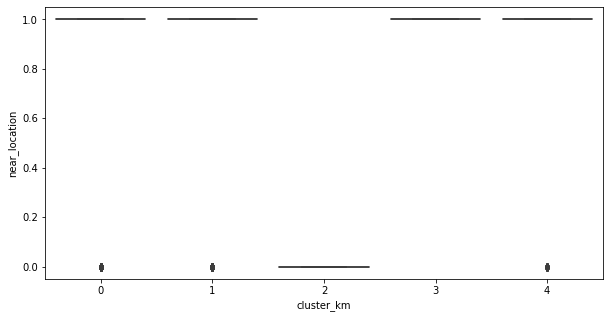

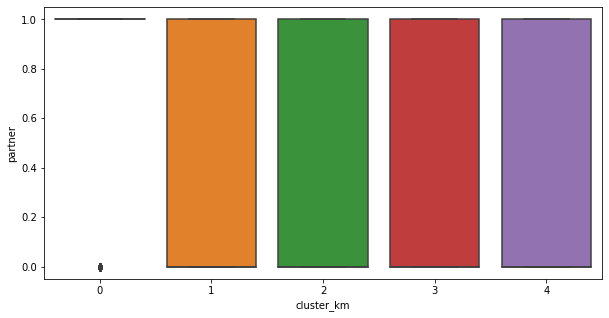

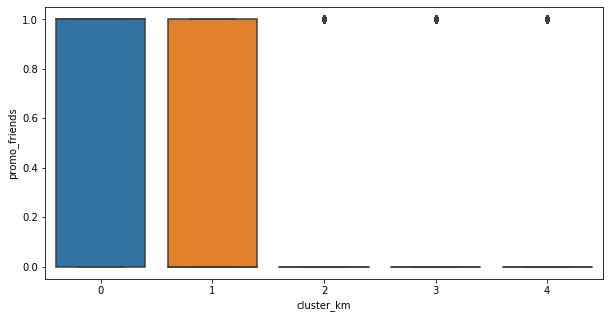

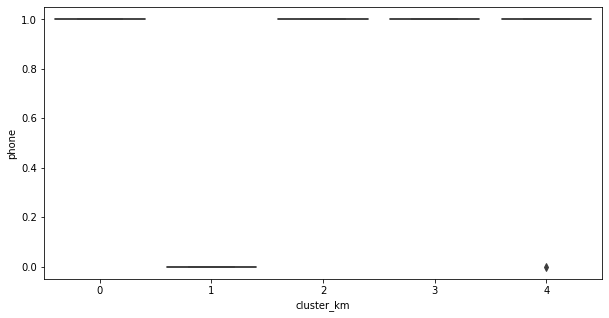

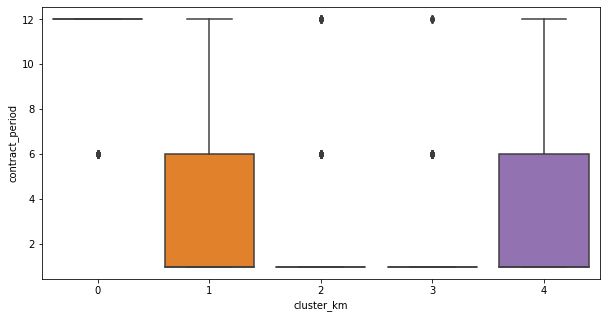

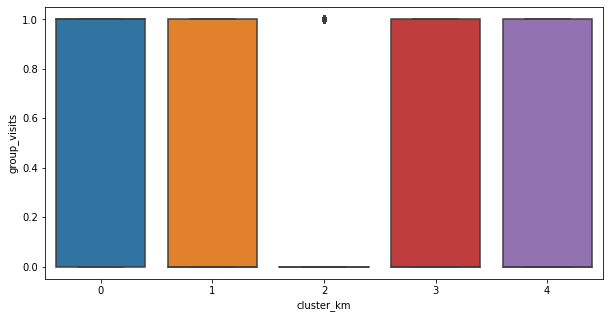

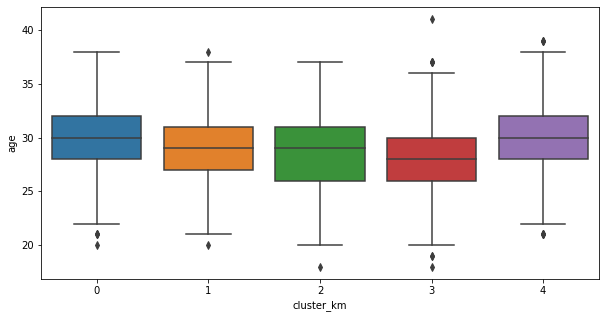

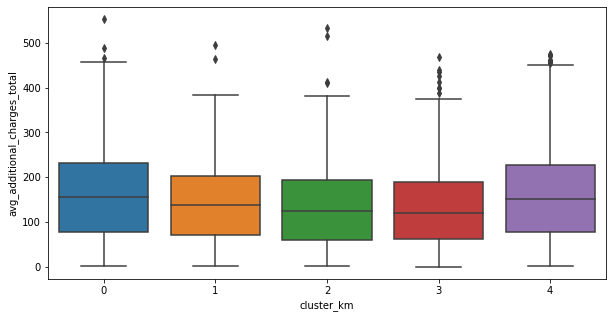

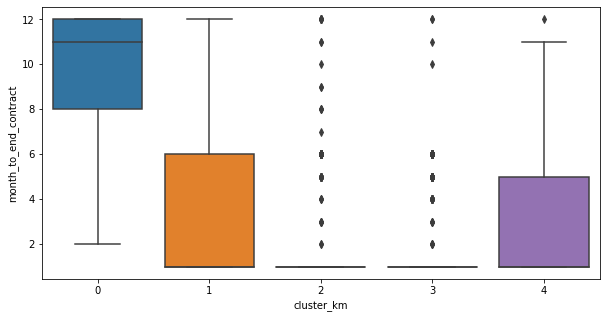

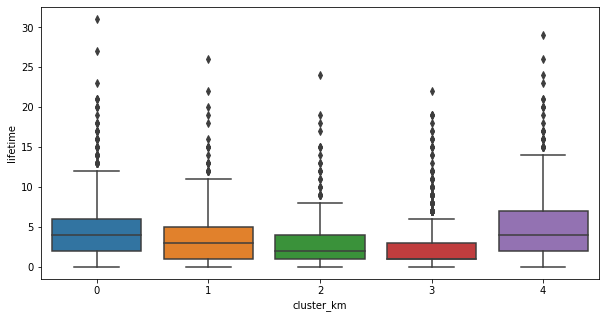

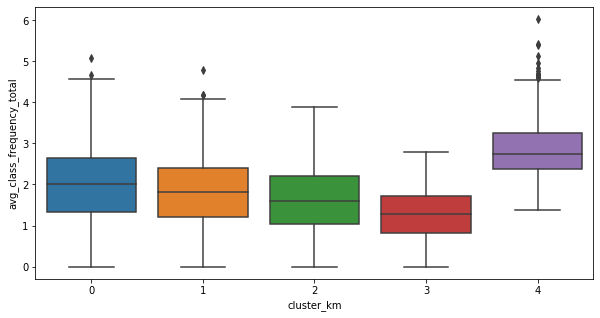

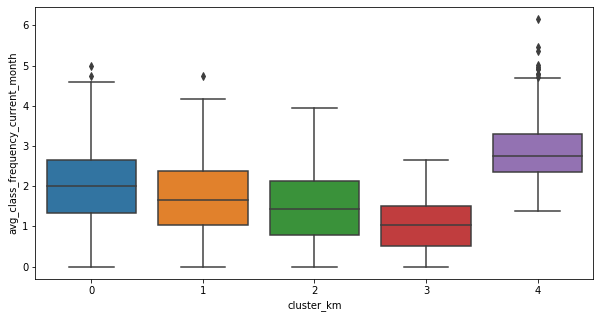

In [20]:
#Построим "ящики с усами" для 5ти кластеров

for column in gym_col:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = 'cluster_km', y = gym_churn[column], data = gym_churn)
    plt.show()

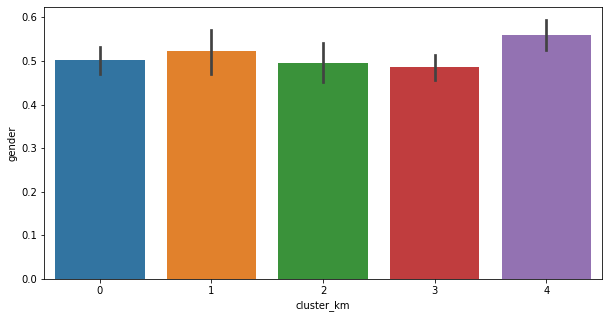

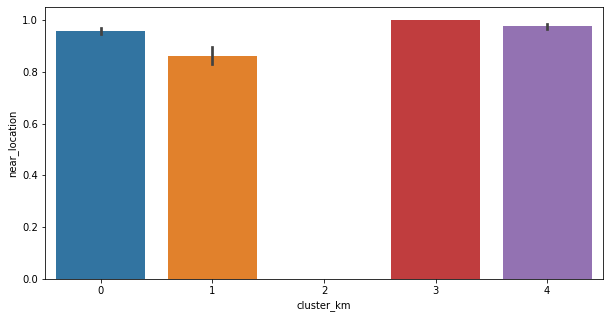

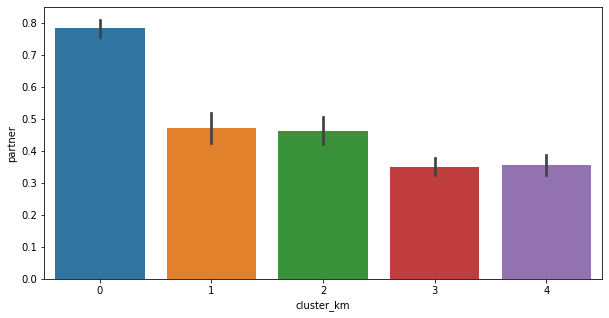

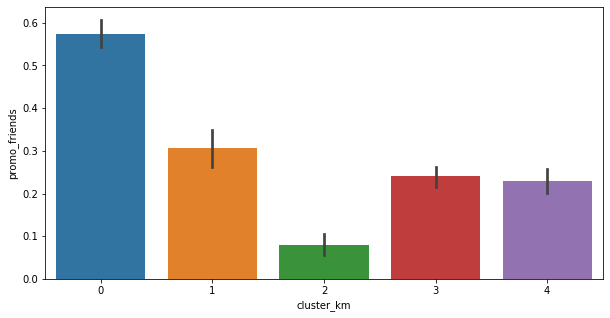

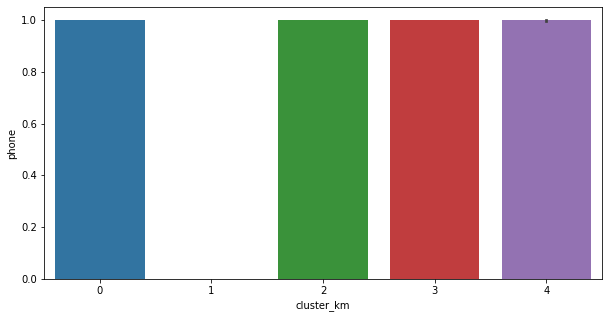

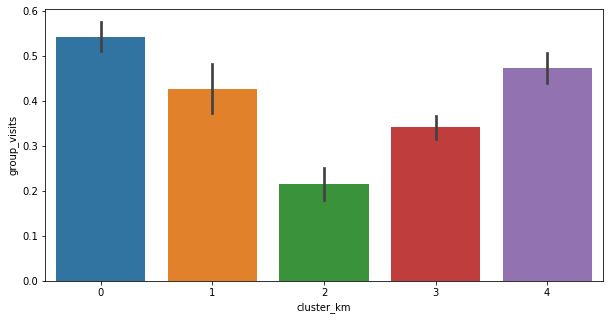

In [21]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(10, 5))
    sns.barplot(x = 'cluster_km', y = gym_churn[column], data = gym_churn)
    plt.show()

Рассмотрим 2ой и 3ий кластеры - лидеры по оттоку
* Распределение по гендерному признаку примерно одинаковое во всех кластерах (50/50%)
* Во 2ом кластере находятся клиенты, которые живут или работают не в районе фитнес-центра, можно сказать что это влияет на отток, почти в 45%. Но в 3ем кластере отток - 51,4%, а клиенты живут или работают в районе фитнес-центра.
* Во 2ом кластере 50% клиентов - сотрудники компаний-партнеров, в 3ем таких клиентов 35%. В то же время у 4ого кластера (отток - 6.8%) такой же показатель кол-ва клиентов - сотрудники компаний-партнеров как и у 3его.
* Наименьшее кол-во клиентов, пришедшие по акции "Приведи друга" во 2ом кластере. В 3ем и 4ом кластерах, таких клиентов по 24%.
* Средняя длительность абонемента во 2ом и 3ем кластерах составляет 1 месяц.
* Клиенты из 2ого и 3его кластера редко посещают групповые занятия (20 и 34 %% соответственно)
* Во 2ом и 3ем кластерах наименьшая суммарная выручка от сопутствующих услуг фитнес-центра.
* Оставшееся время до окончания действующего абонемента у 2ого и 3его кластеров в среднем 1мес. Это не удивительно если - "Средняя длительность абонемента - 1мес"
* Среднее количество посещений в неделю за всё время - 1, максимум 2 раза.
* Количество посещений в предыдущий месяц - так же, 1, максимум 2 раза в неделю


## Шаг 5. Общий вывод и базовые рекомендации по работе с клиентами:

Мы построили модель с неплохой точностью. Теперь мы можем прогнозировать вероятность оттока по каждому клиенту. Явных зависимостей факта оттока от одного конкретного признака из рассматриваемых не обнаружено.

Выводы по имеющимся данным:
* Распределение по генденому прихзнаку примерно одинаковое
* Большинство клиентов (85%) живет или работает районе, где находится фитнес-центр
* Чуть меньше половины клиентов являются сотрудниками партнерских организаций
* 30% клиентов пришли по программе "Приведи друга"
* Известны мобильные номера 90% клиентов
* Средняя длительность абонемента - 4.7 месяца
* 41% клиентов посещают групповые занятия
* Средний возраст клиентов 29 лет
* Суммарная выручка от сопутсвующих услуг фитнес-центра на клиента - 147
* Средний срок до окончания действующего абонемента - 4.3 месяцев
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
* средняя частота посещений за все время с начала действия абонемента - 1.88 раз в неделю
* Средняя частота посещений за последний месяц - 1.77 раз в неделю
**Доля оттока - 27%**

Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:
* Распределение по генденому прихзнаку примерно одинаковое
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга", реже уходят в отток
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность абонемента больше у оставшихся пользователей, у большей части клиентов в оттоке срок абонемента составляет 1 месяц
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
* У групп есть разница в среднем возрасте клиентов(Оставшиеся - 30 лет, в оттоке - 27 лет)
* Есть небольшое различие в выручке от сопутсвующих услуг фитнес-центра (в пользу оставшихся клиентов)
* Оставшееся время до окончания действующего абонемента, логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

Мы разбили всех наших клиентов на 5 кластеров.

* Кластер 0
  * Отток - 2,8% - самый низкий
  * "Высокое" время с момента первого обращения в фитнес-центр - 5 мес.
  * 2ое место по кол-ву посещений за всё время и в последний месяц - 2 раза в неделю
  * 2ое место по суммарной выручка от сопудствующих услуг фитнес-центра - 161
  * Средний возраст 30 лет
  * В основном обладатели долгосрочных абонементов на 1 год
  * 96% клиентов живут или работают недалеко от фитнес-центра
  
* Кластер 1
  * Отток - 27%
  * "Высокое" время с момента первого обращения в фитнес-центр - 4 мес.
  * 3е место по кол-ву посещений за всё время и в последний месяц - 1,8 и 1,7 раза в неделю, соответсвенно
  * 3е место по суммарной выручка от сопудствующих услуг фитнес-центра - 144
  * Средний возраст 29 лет
  * В основном обладатели долгосрочных абонементов на 6 мес
  * 86% клиентов живут или работают недалеко от фитнес-центр
  * Не указывали свой номер телефона

* Кластер 2
  * Отток - 44,4%
  * "Низкое" время с момента первого обращения в фитнес-центр - 2,8 мес.
  * 4ое место по кол-ву посещений за всё время и в последний месяц - 1,66 и 1,48 раза в неделю, соответсвенно
  * 4ое место по суммарной выручка от сопудствующих услуг фитнес-центра - 135,5
  * Средний возраст 28,5 лет
  * Реже всех посещали групповые занятия
  * В основном обладатели не долгосрочных абонементов на 3 мес
  * Клиентов живут или работают не в районе фитнес-центра
  
* Кластер 3
  * Отток - 51,4% - самый высокий
  * "Низкое" время с момента первого обращения в фитнес-центр - 2,4 мес.
  * 5ое место по кол-ву посещений за всё время и в последний месяц - 1,2 и 1 раза в неделю, соответсвенно
  * 5ое место по суммарной выручка от сопудствующих услуг фитнес-центра - 131,6
  * Средний возраст 28 лет
  * В основном обладатели не долгосрочных абонементов на 1-3 мес
  * Клиенты живут или работают в районе фитнес-центра

* Кластер 4
  * Отток - 6,8%
  * "Высокое" время с момента первого обращения в фитнес-центр - 5 мес.
  * 1ое место по кол-ву посещений за всё время и в последний месяц - почти 3 раза в неделю
  * 1ое место по суммарной выручка от сопудствующих услуг фитнес-центра - 161,7
  * Средний возраст 30 лет
  * В основном обладатели не долгосрочных абонементов на 3 мес
  * 98% клиентов живут или работают недалеко от фитнес-центра
  
**Рекомендации:**

1) Привлекать пользователей похожих на кластеры №№ 0 и 4

2) Поддерживать и мотевировать кластеры №№ 0, 1 и 4. Особое внимание по мотивации уделить кластеру №1

3) Глубже сегментировать "оттекающие кластеры" (№№ 2, 3), к каждому сегменту тестировать индивидуальные предложения.

***Так же на основании проведенного исследования можно сказать что, в основном клиенты попадают в отток после 1ого месяца посещения фитнес-центра. Возможно, они покупают абонемент на 1 мес. для "тестирования". А после того как абонемент заканчивается, покидают фитнес-центр.***

***Причины по которым клиенты уходят могут быть разными, начиная от отношения со стороны персонала, заканчивая фитнес-оснащением залов. В этом случае можно порекомендовать обзвонить клиентов, которые не вернулись, после первого месяца, и спросить у них о прошедших тренировках: что не устроило? что можно улучшить? возможно, что-то понравилось?...***

В этом случае менеджеры по работе с клиентами дадут более полную информацию о клиентах, попавших в отток.